In [29]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [30]:
# Load the dataset
x_data = pd.read_csv('/content/drive/MyDrive/Datasets/X data.csv')

x_data.shape

(162980, 2)

In [31]:
x_data.head(10)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [32]:
# Ensure 'clean_text' column is string type
x_data['clean_text'] = x_data['clean_text'].astype(str)

# Apply sentiment analysis and extract scores into new columns
x_data[['neg', 'neu', 'pos', 'compound']] = x_data['clean_text'].apply(
    lambda text: pd.Series(analyzer.polarity_scores(text))
)

In [33]:
x_data.head(10)

,clean_text,category,neg,neu,pos,compound
0,when modi promised “minimum government maximum...,-1.0,0.065,0.781,0.154,0.5267
1,talk all the nonsense and continue all the dra...,0.0,0.184,0.816,0.000,-0.4019
2,what did just say vote for modi welcome bjp t...,1.0,0.000,0.772,0.228,0.7096
3,asking his supporters prefix chowkidar their n...,1.0,0.187,0.655,0.158,-0.0713
4,answer who among these the most powerful world...,1.0,0.000,0.808,0.192,0.4754
5,kiya tho refresh maarkefir comment karo,0.0,0.000,1.000,0.000,0.0000
6,surat women perform yagna seeks divine grace f...,0.0,0.000,0.610,0.390,0.7506
7,this comes from cabinet which has scholars lik...,0.0,0.000,0.839,0.161,0.3612
8,with upcoming election india saga going import...,1.0,0.000,0.927,0.073,0.2023
9,gandhi was gay does modi,1.0,0.000,1.000,0.000,0.0000


In [37]:
# Categorize Sentiment Based on compound Score

def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

x_data['sentiment_category'] = x_data['compound'].apply(categorize_sentiment)

# Display the counts for each sentiment category
print(x_data['sentiment_category'].value_counts())

sentiment_category
Positive    76232
Negative    50939
Neutral     35809
Name: count, dtype: int64


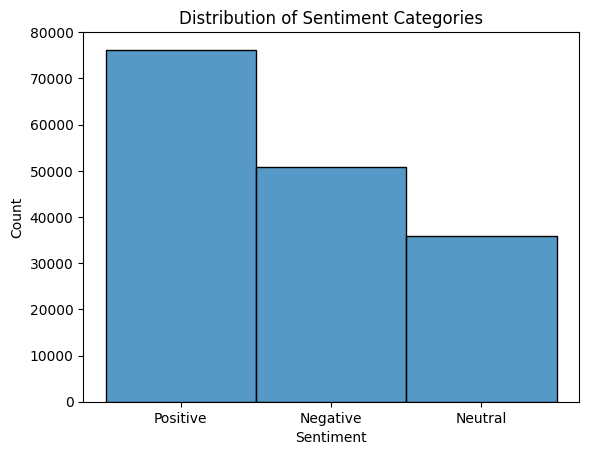

In [35]:
# Plot the sentiment category counts
sns.histplot(x='sentiment_category', data=x_data)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [38]:
# Calculate Overall Sentiment Trend
category_counts = x_data['sentiment_category'].value_counts(normalize=True) * 100
print(category_counts)

sentiment_category
Positive    46.773837
Negative    31.254755
Neutral     21.971408
Name: proportion, dtype: float64
